## 线性回归实现(从0开始)
太强了！整个过程顺下来感觉清晰不少，但是还是感觉自己写写不出来
加油吖~

---

## 导包

In [18]:
%matplotlib inline
import random
import torch
import numpy
from d2l import torch as d2l

## 生成数据

In [10]:
def synthetic_data(w, b, num_examples):
    #均值为0，标准差为1，num_examples个样本，列数是w的长度【num_examples行数表示房屋数量，len(w)列数表示有几个特征：例如房间数，房子大小】
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1,1))   #-1是一个通配符，表示行数自动匹配，列数为1

true_w = torch.tensor([2,-3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [9]:
print('features:',features[0],'\nlabel:',labels[0])

features: tensor([-0.2778, -1.3514]) 
label: tensor([8.2391])


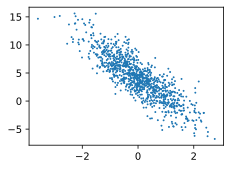

In [20]:
d2l.set_figsize()
d2l.plt.scatter(features[:, 1].detach().numpy(),labels.detach().numpy(),1);

In [21]:
def data_iter(batch_size, features, labels): #features是1000*2 的矩阵，len（）是取他的第一维的长度
    num_examples = len(features)
    indices = list(range(num_examples))#索引
    #这些样本是随机读取的，没有特定顺序
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i:min(i + batch_size, num_examples)] #防止溢出
        )
        yield features[batch_indices], labels[batch_indices]
    
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break
    

tensor([[-0.7614, -0.0276],
        [-0.8010,  0.5426],
        [ 1.2585, -0.6108],
        [ 1.3744, -0.9665],
        [ 0.7861, -0.2541],
        [ 0.7039,  0.0980],
        [ 1.0590,  0.2560],
        [-0.9753,  0.1073],
        [ 0.4674,  1.1910],
        [-2.5201,  1.1098]]) 
 tensor([[ 2.7569],
        [ 0.7584],
        [ 8.8056],
        [10.2398],
        [ 6.6332],
        [ 5.2808],
        [ 5.4462],
        [ 1.8839],
        [ 1.0914],
        [-4.6121]])


## 定义初始化模型参数

In [22]:
w = torch.normal(0, 0.01, size=(2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

## 定义模型

In [23]:
def linreg(X, w, b):
    """线性回归模型"""
    return torch.matmul(X, w)+b

## 定义损失函数

In [28]:
#这里没有将损失函数加起来，在后面才加起来
def squared_loss(y_hat, y):#y_hat预测值，y真实值
    """均方损失"""
    return (y_hat - y.reshape(y_hat.shape))**2 / 2

## 定义优化算法

In [25]:
def sgd(params, lr, batch_size):
    """小批量随机梯度下降"""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_() #需要手动梯度设置为0

## 训练过程

In [33]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y) #X 和 y 的小批量损失
        # 因为l形状是(batch_size,1)，而不是一个标量。l中的所有元素被加到一起，
        # 并以此计算关于[w,b]的梯度
        l.sum().backward()
        sgd([w, b], lr, batch_size)
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch{epoch + 1}, loss {float(train_l.mean()):f}')

epoch1, loss 0.000051
epoch2, loss 0.000051
epoch3, loss 0.000051


## 比较真实参数和通过训练的学到的参数来评估训练的成功程度

In [35]:
print(f'w的估计误差：{true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差：{true_b - b}')

w的估计误差：tensor([-0.0006, -0.0001], grad_fn=<SubBackward0>)
b的估计误差：tensor([-0.0001], grad_fn=<RsubBackward1>)
